In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
import seaborn as sns
from sklearn.model_selection import train_test_split

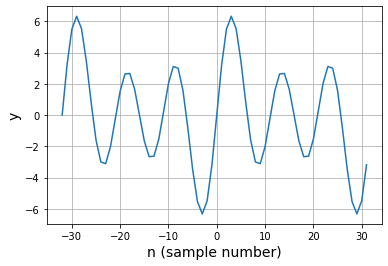

In [ ]:
seed = 42
np.random.seed(seed)
N = 64
k = 2
n = np.arange(0,N) - (N/2)
y = np.sin(2*np.pi*(k/N)*n) + 2*np.sin(2*np.pi*2*(k/N)*n) + 4*np.sin(2*np.pi*3*(k/N)*n)
plt.plot(n,y)
plt.grid()
plt.xlabel('n (sample number)', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

In [ ]:
Y = np.fft.fft(y)

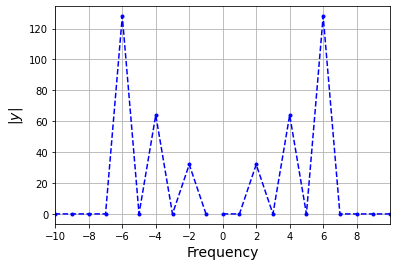

In [ ]:
Y = Y.reshape(N,)
Y_abs = np.abs(Y)
freqs = np.fft.fftfreq(N, d=(1.0/(N*1.0)))
plt.plot(freqs[0:32], Y_abs[0:32], '--.b')
plt.plot(freqs[32:N], Y_abs[32:N], '--.b')
plt.xlim(-10,10)
plt.xticks(range(-10,10,2))
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('$\|y\|$', fontsize=14)
plt.grid()
plt.show()

In [ ]:
M = 10000
X = np.zeros((M,2*N))
y = np.zeros((M,2*N))
for i in range(M):
  s = np.random.normal(loc=0.0, scale=10.0, size=(N,))
  S = np.fft.fft(s)
  X[i,0::2] = s.real
  X[i,1::2] = s.imag
  y[i,0::2] = S.real
  y[i,1::2] = S.imag
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [ ]:
# Instantiate MLPRegressor.
gs = MLPRegressor(solver='adam', activation='relu', batch_size=64, hidden_layer_sizes=(64,), learning_rate='adaptive', max_iter=1000, random_state=seed)

# Train the MLP regressor with grid search.
gs.fit(X_train, y_train)

MLPRegressor(batch_size=64, hidden_layer_sizes=(64,), learning_rate='adaptive',
             max_iter=1000, random_state=42)

In [ ]:
N = 64
k = 2
n = np.arange(0,N) - (N/2)
y = np.sin(2*np.pi*(k/N)*n) + 2*np.sin(2*np.pi*2*(k/N)*n) + 4*np.sin(2*np.pi*3*(k/N)*n)

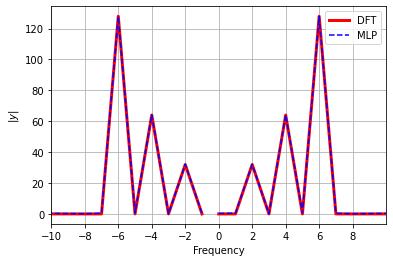

In [ ]:
signal = np.zeros((1,2*N))
signal[0,0::2] = y.real
signal[0,1::2] = y.imag

dft = gs.predict(signal)

dft = dft[0,0::2] + 1j*dft[0,1::2]

dft = dft.reshape(N,)

dft = np.abs(dft)

freqs = np.fft.fftfreq(N, d=(1.0/(N*1.0)))

#print(dft.shape)
#print(dft_orig.shape)
#print(freqs.shape)

#plt.plot(freqs, dft, label='MLP')

plt.plot(freqs[0:32], Y_abs[0:32], 'r', label='DFT', linewidth=3)
plt.plot(freqs[32:N], Y_abs[32:N], 'r', linewidth=3)


plt.plot(freqs[0:32], dft[0:32], '--b', label="MLP")
plt.plot(freqs[32:N], dft[32:N], '--b')
#plt.plot(freqs, dft_orig, label='Original')


plt.xlim(-10,10)
plt.xticks(range(-10,10,2))
plt.xlabel('Frequency')
plt.ylabel('$\|y\|$')
plt.legend()
plt.grid()
plt.show()

Com base no gráfico obtido anteriormente, é possível verificar que a saída da rede MLP e a saída da rede FFT possuem resultados semelhantes.